# 

## Introduction

The data analyzed in this report is provided by the NHTSA (National Highway Traffic Safety Administration). This report analyzes all the complains that were filed for Chevrolet Cobalt.Data for 2005 Chvrolet Cobalt is available to download [here]( http://www.nhtsa.gov/webapi/api/Complaints/vehicle/modelyear/2005/make/chevrolet/model/cobalt?format=csv). Despite knowing about the faulty ignition switch in 2005 when a teenger ran into a tree after loosing control of the steering, Chevrolet continued to manufacturing same ignition switch for Cobalt for a decade until 21 February 2014. NHTSA then fined the Chevrolet $35 million for failing to recall the cars with faulty ignition switches. This report tries to answer some questions such as : Was this problem evident from the NHTSA complaint database long before the 2014 recall? 

## Accessing the Data

The data provided to us is in the CSV format. The use of list of dictionary will be efficient method to store this data since there is defined number of complaints, with each complaint storing its information as key value pair. The request library of python helps to get the data from web into a string.Finally,the pandas and StringIO helps to read this data into a list of dictionary.

In [380]:
def getData(year) :
    import requests
    import pandas
    from io import StringIO
    url = f'http://www.nhtsa.gov/webapi/api/Complaints/vehicle/modelyear/{year}/make/chevrolet/model/cobalt?format=csv'
    s = requests.get(url).text  # this is a CSV string
    df = pandas.read_csv(StringIO(s)) # use pandas to parse the CSV
    complaints = df.to_dict('records') # convert to list of dicts
    return complaints

getData function defined above returns all the complaints filed in the year that will be passed as the argument. Now lets display number of complaints filed in 2005 and first record from the complaint in 2005.

In [381]:
c2005=getData(2005)
print('Total number of complaints filed in 2005 : {}'.format(len(c2005)))
c2005[0]

Total number of complaints filed in 2005 : 1593


{'ODI_ID': 10312200,
 'MFR_NAME': 'General Motors LLC',
 'CRASH_YN': 'No',
 'FIRE_YN': 'No',
 'NUM_INJURED': 0,
 'NUM_DEATHS': 0,
 'INCIDENT_DT': '2010-02-16',
 'RECVD_DT': '2010-02-19',
 'VIN': '1G1AL12F557',
 'COMPONENT': 'STEERING',
 'DESCR': 'TL*THE CONTACT OWNS A 2005 CHEVROLET COBALT. THE CONTACT WAS DRIVING APPROXIMATELY 35 MPH ON NORMAL ROAD CONDITIONS.  SUDDENLY, THERE WAS A LOSS OF POWER STEERING.  THERE WAS DIFFICULTY STEERING THE VEHICLE WHICH RESULTED TO GREATER FORCE IN TURNING THE STEERING WHEEL. THE DRIVER PULLED OVER TO THE SIDE OF THE ROAD. THE ENGINE WAS TURNED OFF. THE VEHICLE RESTARTED AND RESUMED NORMAL OPERATION FOR A SHORT PERIOD TIME. THE FAILURE OCCURRED WHENEVER THE VEHICLE WAS IN OPERATION. CURRENTLY, THE VEHICLE IS INOPERATIVE.  THE VEHICLE HAS NOT BEEN REPAIRED FOR THE MALFUNCTION.  THE FAILURE MILEAGE WAS 89,000. ',
 'PRODUCT_TYPE': 'VEHICLE',
 'MODEL_YR': 2005,
 'MAKE': 'CHEVROLET',
 'MODEL': 'COBALT'}

## Getting to know the Faulty Ignition Switch

The faulty ignition switch is known for causing problem with steering. Since, major problem were detected during the 2005 and 2014 , lets find out number of steering complaints filed over the years for a model of particular year.

In [382]:
def countSteerComplaints_ModelYear(year): # get number of steering complaints for particular year
    cmpl=getData(year)
    count = 0
    for c in cmpl:
        if 'steer' in c['DESCR'].lower():
            count += 1
    return count
print('Number of steering complaints file in 2005 is: {}'.format(countSteerComplaints_ModelYear(2005)) )

Number of steering complaints file in 2005 is: 1177


Using the countSteerComplaints function defined above get all the steering complaints according to car model year and plot a graph. Our last year will be 2010 , since Chevrolet discontinued Cobalt after 2010.

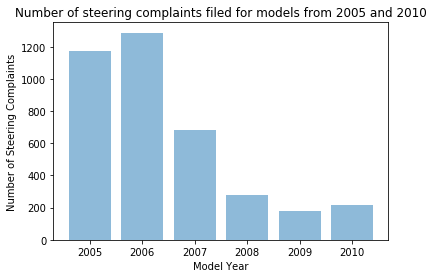

In [383]:
import matplotlib.pyplot as plt

firstyear=2005
lastyear=2010

X=range(firstyear,lastyear+1)
Y=[]
for d in X :
    t=countSteerComplaints(d)
    if(t is not None ) :  # Some years has zero steering complaints.
        Y.append(t)
        
plt.xlabel("Model Year")
plt.ylabel("Number of Steering Complaints")
plt.title(f'Number of steering complaints filed for models from {firstyear} and {lastyear}')        
plt.bar(X,Y,alpha=0.5)
plt.show()

From the graph we can analyze that steering complaints are highest in the 2005 and 2006 Chevrolet Cobalt models.The decrease in the number of complaints over the year suggest that Chevrolet was constantly trying to modify the ignition switch for improvements for future models. 


## Analyzing all steering complaints for each year's model

Now lets find different years over which a particular model's complaint was filed. we will use the percentage of the steering complaints filed in the total number of complain for specific model.  


In [389]:
def convertDate(year,month) :
    date=float(year)+ float(month)/12
    return date

def plotGraphSteer(syear):
    c=getData(syear)
    incidentDate={}
    
    for record in c : 
        date=convertDate(int(record['INCIDENT_DT'][:4]),int(record['INCIDENT_DT'][5:7])) 
        if  date>=2005 and date<=2014 : 
            if date not in incidentDate:
                incidentDate[date] =1
            else :
                incidentDate[date] +=1
    
    X=sorted(incidentDate.keys())
    Y=[ (incidentDate[d]/len(c))*100 for d in X]
    
    plt.plot(X,Y,alpha=1, label=syear)


Plotting graph for the Percentage of Steering complaints in 2005:

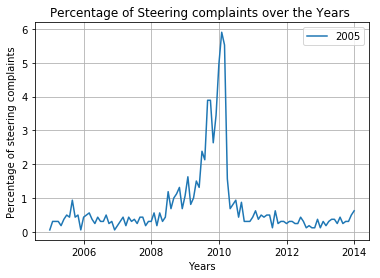

In [390]:
plotGraphSteer(2005)
plt.legend()
plt.xlabel("Years")
plt.ylabel("Percentage of steering complaints")
plt.title("Percentage of Steering complaints of 2005 ")
plt.grid()
plt.show()

2005 Chevrolet Cobalt had highest complaint in 2010 for steering at 6%.

Now lets plot the same graph for different models of cobalt

In [391]:
def plotAllGraphSteer():
    plt.figure(figsize=(20,10))
    firstyear=2005
    lastyear=2011
    for d in range(firstyear,lastyear):
        plotGraph(d)
    plt.legend()
    plt.xlabel("Years")
    plt.ylabel("Percentage of steering complaints")
    plt.title("Percentage of Steering complaints over the Years for each model")
    plt.grid()
    plt.show()

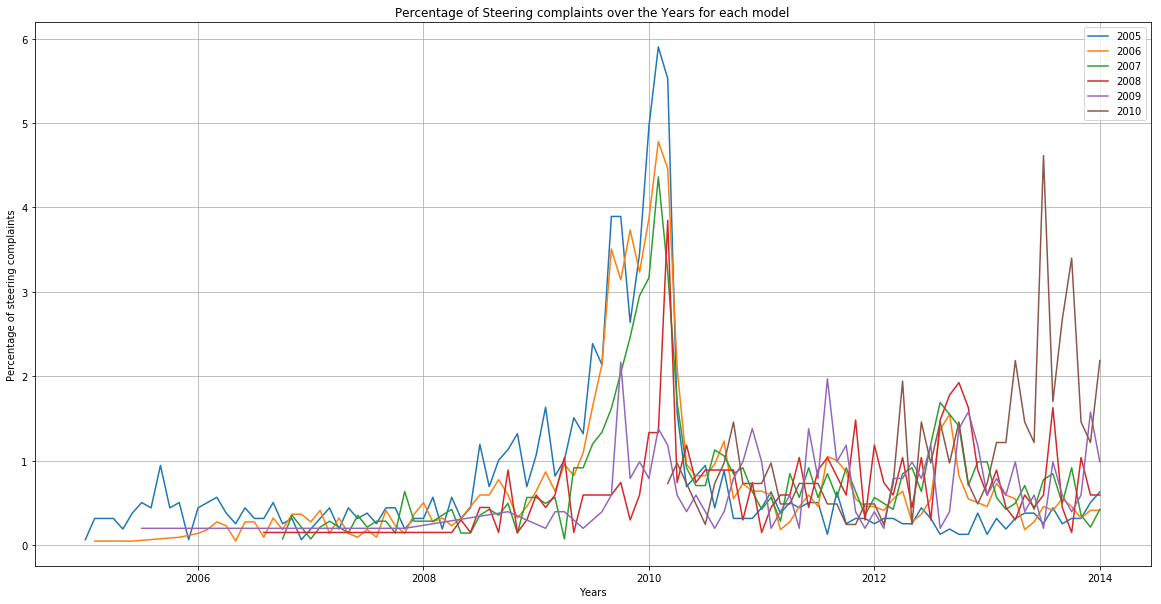

In [397]:
plotAllGraphSteer()

In 2010 there was the highest number of steering complaints for all models from 2005 to 2009. We could justify this by one of the following :

1) All Chevrolet Cobalt models from 2005 to 2009 were using the same ignition switch that were made for the first Chevrolet Cobalt in 2005.And if the lifespan of the ignition switch were to be 5 years, it explains why each model has its highest steering complaint in 2010. 

2) In 2010,GM also recalled 40859 Chevrolet Cobalt for potential fuel leak.This may have encouraged more people to file the complaint regarding other problems in the car.

Also, although all models have their highest steering complaint in 2010 the number of complaints are relatively lower then the previous year model.

Other interesting thing to note from the above graph is that all Chevrolet Cobalt 2010 model had their highest number of steering complaints in somewhere between 2013-2014.Which suggest that, Chevrolet might have used the same ignition switch pattern to make new ignition switch in around 2009 that were used for previous models from 2005 which has a lifespan of around 5 years. 


This graph is a clear evident that problem in the steering could have been easily noticed and rectified anytime between 2010 and 2014 , if this data was analyzed.


##  Analyzing data for accidents linked to faulty ignition switch

Problems with faulty ignition switch are related with steering, but not all steering problems are caused by ignition switch. Keeping this in mind , lets find all complaints which has steering issues and was involved in crash.


In [398]:
def steerGraph_crashY(syear) : # function to find all the 
    c=getData(syear)
    incidentDate={}
    count=0   
    for record in c:
        date=convertDate(int(record['INCIDENT_DT'][:4]),int(record['INCIDENT_DT'][5:7]))
        if (record['CRASH_YN']=='Yes' ):
            count+=1
            if 'steer' in record['DESCR'].lower() and date>=2005 and date<=2014:
                if date not in incidentDate:
                    incidentDate[date] =1
                else :
                    incidentDate[date] +=1
                
    X=sorted(incidentDate.keys())
    Y=[incidentDate[d] for d in X]
    
    plt.plot(X,Y,alpha=1, label=syear)


Plotting a graph of number of complaint filed for 2005 model: 

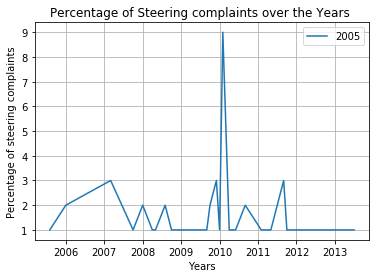

In [399]:
steerGraph_crashY(2005)
plt.legend()
plt.xlabel("Years")
plt.ylabel("Number of Accidents")
plt.title("Percentage of Steering complaints in 2005")
plt.grid()
plt.show()


In [400]:
def allSteerGraph_crashY():
    plt.figure(figsize=(15,10))
    firstyear=2005
    lastyear=2011
    for d in range(firstyear,lastyear):
        steerGraph_crashY(d)
    plt.legend()
    plt.xlabel("Years")
    plt.ylabel("Number of Accidents")
    plt.title("Number of Accidents of each model over the years ")
    plt.grid()
    plt.show()

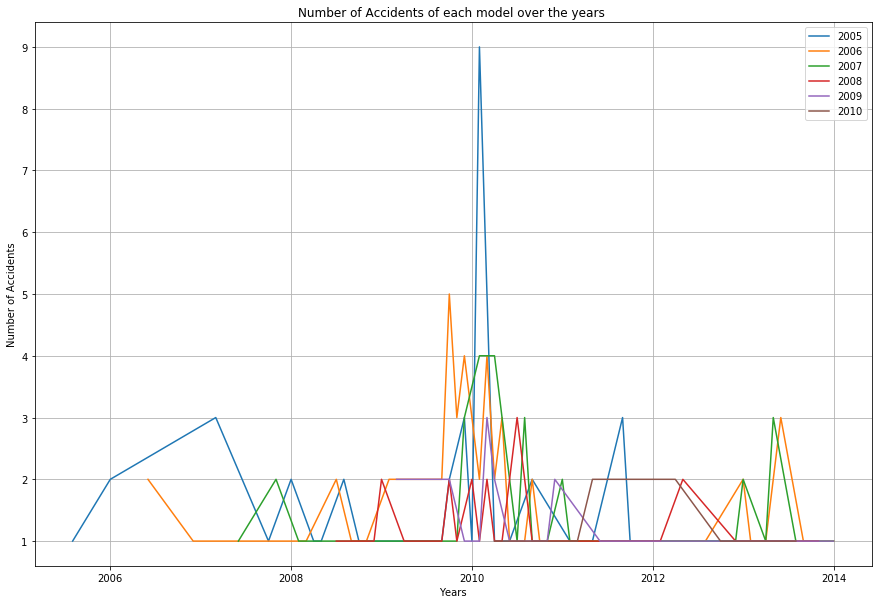

In [401]:
allSteerGraph_crashY()

From the above graph we can see that the highest number of accidents occurred in 2010 for all models from 2005 and 2009.Also, for all 2010 models graph has the highest peak between 2012-2013.

Also, similar to the steer complaint graph although 2010 has highest number of accidents , it is decreasing with each model.

One more important point to note here is that the number of accidents were highest in 2010 and from steer complaints graph over the year, we can see that highest percentage of steering complaints were also filed in 2010 for all models from 2005 to 2009.For 2010 model also, we see the similar trends from both the graphs.

# Conclusion

The Chevrolet evidently would have found the problem if this data was analyzed before 2014. But the trends also show that the complaints and accidents related to steer and ignition switch are decreasing with each newer model of the Cobalt.This suggest that Chevrolet was constantly trying to improve the faulty ignition switch but it was not enough to completely eradicate the problem of faulty ignition switch. Also, Chevrolet did not actually recognized the issue publicly to avoid possible lawsuit for the issue. It seems that after increasing number of complaints in 2010 they changed the design of the ignition switch.But this change was not in favor of the Chevrolet until after 2010 , when they stopped manufacturing Chevrolet Cobalt. 
